In [1]:
import pandas as pd
import numpy as np

# Problem 1 : Data Cleaning 1



In [2]:
companies=pd.read_csv('companies.txt',encoding='ansi',sep='\t')
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [3]:
rounds2=pd.read_csv('rounds2.csv',encoding='ansi')
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [4]:
rounds2['company_permalink']=rounds2['company_permalink'].str.lower()
companies['permalink']=companies['permalink'].str.lower()

In [5]:
# Q1.1
#How many unique companies are present in rounds2?
rounds2['company_permalink'].nunique()

66368

In [6]:
# How many unique companies are present in companies?
companies['permalink'].nunique()

66368

In [ ]:
# In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.
permalink

In [ ]:
# Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N
No 

In [7]:
# Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame.
# Name the merged frame master_frame. How many observations are present in master_frame?
master_frame=pd.merge(companies,rounds2, left_on='permalink', right_on='company_permalink')
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [8]:
master_frame.shape

(114949, 16)

# Problem 2 : Funding Type Analysis


In [9]:
# Calculate the most representative value of the investment amount for each of the four funding types 
# (venture, angel, seed, and private equity) and report the answers in the template provided on the previous page
master_frame[master_frame['funding_round_type'].isin(['venture','angel','seed','private_equity'])].groupby('funding_round_type')['raised_amount_usd'].mean()


funding_round_type
angel             9.586945e+05
private_equity    7.330859e+07
seed              7.198180e+05
venture           1.174895e+07
Name: raised_amount_usd, dtype: float64

In [71]:
# Venture is the most suitable investment for Teclov

In [10]:
#2. Based on the most representative investment amount calculated above, which investment type do you think 
# is the most suitable for Teclov? [Considering that Teclov wants to invest between 5 to 15 million USD per investment
# round, which investment type is the most suitable for it? Identify the investment type
# and, for further analysis, filter the data so it only contains the chosen investment type.]


venture= master_frame[master_frame['funding_round_type']=='venture']
venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


# Problem 3: Country Analysis 

In [11]:
# Teclov wants to see the top nine countries which have received the highest total 
# funding (across ALL sectors for the chosen investment type)
top9 = venture.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(9)
top9

country_code
USA    4.225108e+11
CHN    3.983542e+10
GBR    2.024563e+10
IND    1.439186e+10
CAN    9.583332e+09
FRA    7.259537e+09
ISR    6.907515e+09
DEU    6.346960e+09
JPN    3.363677e+09
Name: raised_amount_usd, dtype: float64

In [12]:
# For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment
#  amount each country has received)

top9=pd.DataFrame(top9)
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [13]:
# As only USA, Great Britain & India are English Speaking Companies 
top9.loc[('USA','GBR','IND'),]

,raised_amount_usd
country_code,
USA,4.225108e+11
GBR,2.024563e+10
IND,1.439186e+10


# Problem 4: Sector Analysis 1 

In [14]:
venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN


In [15]:
# Extract the primary sector of each category list from the category_list
primary_sector = venture['category_list'].str.split('|').str[0]
venture['primary_sector']=primary_sector
venture

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software
8,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,01-01-1997,/organization/0ndine-biomedical-inc,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,NaN,21-12-2009,719491.0,Biotechnology
10,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,B,09-11-2015,20000000.0,Analytics
11,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,NaN,03-01-2013,1700000.0,Analytics
12,/organization/0xdata,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,01-01-2011,/organization/0xdata,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,A,19-07-2014,8900000.0,Analytics
22,/organization/1-mainstream,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,01-03-2012,/organization/1-mainstream,/funding-round/b952cbaf401f310927430c97b68162ea,venture,NaN,17-03-2015,5000000.0,Apps


In [ ]:
# alternate method
'''a=venture['category_list'].str.split('|').replace(np.nan,' ').head(60)
ls=[]
for i in range(len(a)):
    ls=ls+[a[i][0]]
    print(i,ls)
primary_sector=pd.Series(ls)
primary_sector'''


In [16]:
# Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors
# (Note that ‘Others’ is also considered one of the main sectors)
mapping=pd.read_csv('mapping.csv')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [18]:
a= mapping.iloc[:,1:].idxmax(axis=1)
a

0                                       Blanks
1                                Manufacturing
2                                Manufacturing
3                                Manufacturing
4      Social, Finance, Analytics, Advertising
5                                       Health
6      Social, Finance, Analytics, Advertising
7                                Manufacturing
8                          Automotive & Sports
9      Social, Finance, Analytics, Advertising
10     Social, Finance, Analytics, Advertising
11     Social, Finance, Analytics, Advertising
12     Social, Finance, Analytics, Advertising
13                                      Others
14                         Automotive & Sports
15                               Manufacturing
16                  Cleantech / Semiconductors
17                                      Others
18                                      Others
19                                      Others
20                                      Health
21           

In [ ]:
# Alternate Method
'''mapping.iloc[:,1:].dot(mapping.iloc[:,1:].columns).head()'''

In [ ]:
# Alternate Method
'''
for j in range (len(mapping)):
    for i in range (1,len(mapping.columns)):
        
        if mapping[mapping.columns[i]][j] == 1:
            print(mapping.columns[i])
            '''

In [19]:
mapping['main_sector']=a
mapping.head()


,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [20]:
mapping = mapping[['category_list','main_sector']]
mapping

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
6,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,Manufacturing
8,Adventure Travel,Automotive & Sports
9,Advertising,"Social, Finance, Analytics, Advertising"


In [21]:
venture.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,Media
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,Application Platforms
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,Apps
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,Curated Web
5,/organization/004-technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,/organization/004-technologies,/funding-round/1278dd4e6a37fa4b7d7e06c21b3c1830,venture,NaN,24-07-2014,NaN,Software


In [22]:
mapping

,category_list,main_sector
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,Health
6,Ad Targeting,"Social, Finance, Analytics, Advertising"
7,Advanced Materials,Manufacturing
8,Adventure Travel,Automotive & Sports
9,Advertising,"Social, Finance, Analytics, Advertising"


In [23]:
mapping2 = pd.merge(mapping,venture,on="category_list")
mapping2

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,NaN,Blanks,/organization/123feng-com,123Feng.Com,http://123feng.com/,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0,NaN
1,NaN,Blanks,/organization/17-media,17 Media,http://17.media,operating,NaN,NaN,NaN,NaN,15-07-2015,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0,NaN
2,NaN,Blanks,/organization/1mxians,1mxians,http://www.1mxian.com/,operating,CHN,22,Beijing,Beijing,01-01-2014,/organization/1mxians,/funding-round/6950448f81c6706abe61f659e15a7c87,venture,A,02-12-2015,15000000.0,NaN
3,NaN,Blanks,/organization/24fab,24fab,https://www.24fab.com/,operating,ESP,29,Madrid,Madrid,NaN,/organization/24fab,/funding-round/e67f480303e9ad9aa4dffce1ea87a1b8,venture,NaN,20-07-2015,NaN,NaN
4,NaN,Blanks,/organization/24fab,24fab,https://www.24fab.com/,operating,ESP,29,Madrid,Madrid,NaN,/organization/24fab,/funding-round/f7667e10f2d6381f4886fdbde2dbcbfb,venture,NaN,11-09-2014,NaN,NaN
5,NaN,Blanks,/organization/3is,3IS,http://www.3isinc.com/,operating,NaN,NaN,NaN,NaN,NaN,/organization/3is,/funding-round/179eeed3ce63eaac13a1f548d7e1dd20,venture,NaN,02-05-2008,NaN,NaN
6,NaN,Blanks,/organization/3pl-central,3PL Central,http://3plcentral.com/,operating,USA,CA,Los Angeles,Manhattan Beach,01-01-2006,/organization/3pl-central,/funding-round/895e7a284b35bdf86103e52db8a630a6,venture,NaN,03-12-2015,17500000.0,NaN
7,NaN,Blanks,/organization/4-antibody-ag,4-Antibody AG,NaN,operating,NaN,NaN,NaN,NaN,NaN,/organization/4-antibody-ag,/funding-round/7c1b312fd45a3ac21a44a9c8b2f6fb0f,venture,A,16-01-2007,13660000.0,NaN
8,NaN,Blanks,/organization/4energy,4energy,NaN,operating,NaN,NaN,NaN,NaN,NaN,/organization/4energy,/funding-round/e726f6c768f6e3dce1202d31897c3cc2,venture,NaN,11-04-2011,NaN,NaN
9,NaN,Blanks,/organization/51cto,51CTO,http://www.51cto.com/,operating,CHN,22,Beijing,Beijing,NaN,/organization/51cto,/funding-round/8e4af9cbe06e0c5883b90d11a7c6251c,venture,NaN,23-11-2015,16000000.0,NaN


# Problem 5: Sector Analysis 2 
1. Create three separate data frames D1, D2 and D3 for each of the three
countries containing the observations of funding type FT falling within the 5-15
million USD range. The three data frames should contain:
! All the columns of the master_frame along with the primary sector and the
main sector
! The total number (or count) of investments for each main sector in a separate
column
! The total amount invested in each main sector in a separate column
Using the three data frames, you can calculate the total number and amount of
investments in each main sector.

In [26]:
a = mapping2[(mapping2['raised_amount_usd']>5000000) & (mapping2['raised_amount_usd']<15000000)]
a

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
0,NaN,Blanks,/organization/123feng-com,123Feng.Com,http://123feng.com/,operating,CHN,2,Hangzhou,Hangzhou,01-01-2014,/organization/123feng-com,/funding-round/9d83084d87dc63a309c9a6fe9bf59d1b,venture,A,27-10-2015,13000000.0,NaN
1,NaN,Blanks,/organization/17-media,17 Media,http://17.media,operating,NaN,NaN,NaN,NaN,15-07-2015,/organization/17-media,/funding-round/f8ffde9fa822843ac6ea9b66cc615df1,venture,A,05-11-2015,10000000.0,NaN
7,NaN,Blanks,/organization/4-antibody-ag,4-Antibody AG,NaN,operating,NaN,NaN,NaN,NaN,NaN,/organization/4-antibody-ag,/funding-round/7c1b312fd45a3ac21a44a9c8b2f6fb0f,venture,A,16-01-2007,13660000.0,NaN
20,NaN,Blanks,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,operating,USA,WA,Seattle,Seattle,01-01-2003,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,NaN
21,NaN,Blanks,/organization/acco-sa,ACCO SA,http://www.acco-ic.com,operating,NaN,NaN,NaN,NaN,NaN,/organization/acco-sa,/funding-round/d8262b0814ca0af05cebb794dd990a26,venture,B,30-07-2007,10000000.0,NaN
40,NaN,Blanks,/organization/aesthetic-sciences,Aesthetic Sciences,NaN,closed,NaN,NaN,NaN,NaN,NaN,/organization/aesthetic-sciences,/funding-round/26c255b4ef5a72832de42d458923234c,venture,A,29-11-2006,6000000.0,NaN
53,NaN,Blanks,/organization/altela,Altela,http://altelainc.com/,operating,USA,NM,Albuquerque,Albuquerque,NaN,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,NaN
66,NaN,Blanks,/organization/apl-software,APL Software,http://www.apl-soft.com/,operating,USA,CA,SF Bay Area,San Jose,NaN,/organization/apl-software,/funding-round/829db5718a04b580b0fcb1317a0d4457,venture,NaN,27-10-2015,5200000.0,NaN
69,NaN,Blanks,/organization/apr,APR,NaN,operating,USA,NJ,Newark,Upper Saddle River,NaN,/organization/apr,/funding-round/9999be24b9422a2f523bf031cfea5e60,venture,NaN,05-05-2009,8776639.0,NaN
73,NaN,Blanks,/organization/arroyo-optics,Arroyo Optics,NaN,acquired,USA,CA,Los Angeles,Santa Monica,NaN,/organization/arroyo-optics,/funding-round/e053714e9cf47c0d0280cfdcf48b4961,venture,NaN,01-06-2001,8870000.0,NaN


# D1


In [27]:
D1 = a[ a['country_code'] == 'USA']
D1.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
20,NaN,Blanks,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,operating,USA,WA,Seattle,Seattle,01-01-2003,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,NaN
53,NaN,Blanks,/organization/altela,Altela,http://altelainc.com/,operating,USA,NM,Albuquerque,Albuquerque,NaN,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,NaN
66,NaN,Blanks,/organization/apl-software,APL Software,http://www.apl-soft.com/,operating,USA,CA,SF Bay Area,San Jose,NaN,/organization/apl-software,/funding-round/829db5718a04b580b0fcb1317a0d4457,venture,NaN,27-10-2015,5200000.0,NaN
69,NaN,Blanks,/organization/apr,APR,NaN,operating,USA,NJ,Newark,Upper Saddle River,NaN,/organization/apr,/funding-round/9999be24b9422a2f523bf031cfea5e60,venture,NaN,05-05-2009,8776639.0,NaN
73,NaN,Blanks,/organization/arroyo-optics,Arroyo Optics,NaN,acquired,USA,CA,Los Angeles,Santa Monica,NaN,/organization/arroyo-optics,/funding-round/e053714e9cf47c0d0280cfdcf48b4961,venture,NaN,01-06-2001,8870000.0,NaN


In [28]:
a1 = D1.groupby('main_sector')['raised_amount_usd'].count()
a1 = pd.DataFrame(a1)
a1.reset_index(inplace=True)


In [29]:
a1.rename(columns={'raised_amount_usd':'count'},inplace=True)
a1

,main_sector,count
0,Automotive & Sports,35
1,Blanks,68
2,Cleantech / Semiconductors,1494
3,Entertainment,158
4,Health,498
5,Manufacturing,353
6,"News, Search and Messaging",449
7,Others,1728
8,"Social, Finance, Analytics, Advertising",281


In [30]:
#
D1 = pd.merge(D1,a1,on='main_sector')
D1.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count
0,NaN,Blanks,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,operating,USA,WA,Seattle,Seattle,01-01-2003,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,NaN,68
1,NaN,Blanks,/organization/altela,Altela,http://altelainc.com/,operating,USA,NM,Albuquerque,Albuquerque,NaN,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,NaN,68
2,NaN,Blanks,/organization/apl-software,APL Software,http://www.apl-soft.com/,operating,USA,CA,SF Bay Area,San Jose,NaN,/organization/apl-software,/funding-round/829db5718a04b580b0fcb1317a0d4457,venture,NaN,27-10-2015,5200000.0,NaN,68
3,NaN,Blanks,/organization/apr,APR,NaN,operating,USA,NJ,Newark,Upper Saddle River,NaN,/organization/apr,/funding-round/9999be24b9422a2f523bf031cfea5e60,venture,NaN,05-05-2009,8776639.0,NaN,68
4,NaN,Blanks,/organization/arroyo-optics,Arroyo Optics,NaN,acquired,USA,CA,Los Angeles,Santa Monica,NaN,/organization/arroyo-optics,/funding-round/e053714e9cf47c0d0280cfdcf48b4961,venture,NaN,01-06-2001,8870000.0,NaN,68


In [31]:
b1 = D1.groupby('main_sector')['raised_amount_usd'].sum()
b1 = pd.DataFrame(b1)
b1.reset_index(inplace=True)

In [32]:
b1.rename(columns={'raised_amount_usd':'sum'},inplace=True)
b1

,main_sector,sum
0,Automotive & Sports,2.862028e+08
1,Blanks,5.947633e+08
2,Cleantech / Semiconductors,1.357599e+10
3,Entertainment,1.378120e+09
4,Health,4.490750e+09
5,Manufacturing,3.218865e+09
6,"News, Search and Messaging",3.865548e+09
7,Others,1.554731e+10
8,"Social, Finance, Analytics, Advertising",2.484532e+09


In [33]:
#
D1 = pd.merge(D1,b1,on='main_sector')
D1.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count,sum
0,NaN,Blanks,/organization/accelerator-corp,Accelerator Corp.,http://www.acceleratorcorp.com,operating,USA,WA,Seattle,Seattle,01-01-2003,/organization/accelerator-corp,/funding-round/d1341bc6df5065519b7b399ac9a67823,venture,NaN,19-11-2004,11800000.0,NaN,68,594763292.0
1,NaN,Blanks,/organization/altela,Altela,http://altelainc.com/,operating,USA,NM,Albuquerque,Albuquerque,NaN,/organization/altela,/funding-round/b081fcbfc3ed22619250798744d259f1,venture,A,22-10-2007,7100000.0,NaN,68,594763292.0
2,NaN,Blanks,/organization/apl-software,APL Software,http://www.apl-soft.com/,operating,USA,CA,SF Bay Area,San Jose,NaN,/organization/apl-software,/funding-round/829db5718a04b580b0fcb1317a0d4457,venture,NaN,27-10-2015,5200000.0,NaN,68,594763292.0
3,NaN,Blanks,/organization/apr,APR,NaN,operating,USA,NJ,Newark,Upper Saddle River,NaN,/organization/apr,/funding-round/9999be24b9422a2f523bf031cfea5e60,venture,NaN,05-05-2009,8776639.0,NaN,68,594763292.0
4,NaN,Blanks,/organization/arroyo-optics,Arroyo Optics,NaN,acquired,USA,CA,Los Angeles,Santa Monica,NaN,/organization/arroyo-optics,/funding-round/e053714e9cf47c0d0280cfdcf48b4961,venture,NaN,01-06-2001,8870000.0,NaN,68,594763292.0


In [34]:
# 1. Total number of investments (count)
D1['raised_amount_usd'].count()

5064

In [35]:
# 2. Total amount of investment (USD)
D1['raised_amount_usd'].sum()

45442078804.0

In [36]:
D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     1728
Cleantech / Semiconductors                 1494
Health                                      498
News, Search and Messaging                  449
Manufacturing                               353
Social, Finance, Analytics, Advertising     281
Entertainment                               158
Blanks                                       68
Automotive & Sports                          35
Name: raised_amount_usd, dtype: int64

In [37]:
D1.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                     1.554731e+10
Cleantech / Semiconductors                 1.357599e+10
Health                                     4.490750e+09
News, Search and Messaging                 3.865548e+09
Manufacturing                              3.218865e+09
Social, Finance, Analytics, Advertising    2.484532e+09
Entertainment                              1.378120e+09
Blanks                                     5.947633e+08
Automotive & Sports                        2.862028e+08
Name: raised_amount_usd, dtype: float64

In [ ]:
# 3. Top sector (based on count of investments)
Others

In [ ]:
# 4. Second-best sector (based on count of investments)
Cleantech / Semiconductors

In [ ]:
# 5. Third-best sector (based on count of investments)
Health

In [ ]:
# 6. Number of investments in the top sector (refer to point 3)
1728

In [ ]:
# 7. Number of investments in the second-best sector (refer to point 4) 
1494

In [ ]:
# 8. Number of investments in the third-best sector (refer to point 5)
498

In [38]:
D1.groupby(['main_sector','name'])['raised_amount_usd'].count().sort_values(ascending=False).head()

main_sector                              name                 
Cleantech / Semiconductors               Tigo Energy              7
                                         SCIenergy                6
Health                                   EndoGastric Solutions    6
Social, Finance, Analytics, Advertising  ChoiceStream             6
Cleantech / Semiconductors               WiSpry                   5
Name: raised_amount_usd, dtype: int64

In [ ]:
# 9. For the top sector count-wise (point 3), which company received the highest investment?
Cleantech / Semiconductors - Tigo Energy 

In [ ]:
# 10. For the second-best sector count-wise (point 4), which company received the highest investment?
Health  - EndoGastric Solution

# D2 

In [39]:
D2 = a[ a['country_code'] == 'GBR']
D2.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
150,NaN,Blanks,/organization/caldan-therapeutics,Caldan Therapeutics,http://www.endole.co.uk/company/SC515558/calda...,closed,GBR,V2,Glasgow,Glasgow,NaN,/organization/caldan-therapeutics,/funding-round/e1a56bdc20e599e764ceba966435f902,venture,A,04-11-2015,6859169.0,NaN
166,NaN,Blanks,/organization/cellcast,Cellcast,http://www.cellcast.tv,operating,GBR,H9,London,London,01-01-2002,/organization/cellcast,/funding-round/a7de7f21d69ae38fb2e112d3da382dc1,venture,A,22-08-2007,5250000.0,NaN
226,NaN,Blanks,/organization/datalase,DataLase,http://www.datalase.com/,operating,GBR,E9,GBR - Other,Widnes,NaN,/organization/datalase,/funding-round/9089790eb6d7dd2596e1ae39f3aa0c59,venture,NaN,18-02-2007,10000000.0,NaN
718,NaN,Blanks,/organization/paragon-software-3,Paragon Software,http://www.paragonsoftware.com/,operating,GBR,P4,Newbury,Newbury,NaN,/organization/paragon-software-3,/funding-round/a819eadc42aacb29e301c406fc7b7fea,venture,D,22-11-1999,14000000.0,NaN
863,NaN,Blanks,/organization/sensible-lender,Sensible Lender,NaN,closed,GBR,NaN,NaN,NaN,NaN,/organization/sensible-lender,/funding-round/6c103d361458d6591e04439447208a06,venture,A,16-11-2015,10655679.0,NaN


In [40]:
D2.groupby('main_sector')['raised_amount_usd'].count()

main_sector
Automotive & Sports                          3
Blanks                                       6
Cleantech / Semiconductors                 104
Entertainment                               27
Health                                      12
Manufacturing                               27
News, Search and Messaging                  30
Others                                      95
Social, Finance, Analytics, Advertising     20
Name: raised_amount_usd, dtype: int64

In [41]:
a2 = D2.groupby('main_sector')['raised_amount_usd'].count()
a2 = pd.DataFrame(a2)
a2.reset_index(inplace=True)

In [42]:
a2.rename(columns={'raised_amount_usd':'count'},inplace=True)
a2

,main_sector,count
0,Automotive & Sports,3
1,Blanks,6
2,Cleantech / Semiconductors,104
3,Entertainment,27
4,Health,12
5,Manufacturing,27
6,"News, Search and Messaging",30
7,Others,95
8,"Social, Finance, Analytics, Advertising",20


In [43]:
#
D2 = pd.merge(D2,a2,on='main_sector')
D2.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count
0,NaN,Blanks,/organization/caldan-therapeutics,Caldan Therapeutics,http://www.endole.co.uk/company/SC515558/calda...,closed,GBR,V2,Glasgow,Glasgow,NaN,/organization/caldan-therapeutics,/funding-round/e1a56bdc20e599e764ceba966435f902,venture,A,04-11-2015,6859169.0,NaN,6
1,NaN,Blanks,/organization/cellcast,Cellcast,http://www.cellcast.tv,operating,GBR,H9,London,London,01-01-2002,/organization/cellcast,/funding-round/a7de7f21d69ae38fb2e112d3da382dc1,venture,A,22-08-2007,5250000.0,NaN,6
2,NaN,Blanks,/organization/datalase,DataLase,http://www.datalase.com/,operating,GBR,E9,GBR - Other,Widnes,NaN,/organization/datalase,/funding-round/9089790eb6d7dd2596e1ae39f3aa0c59,venture,NaN,18-02-2007,10000000.0,NaN,6
3,NaN,Blanks,/organization/paragon-software-3,Paragon Software,http://www.paragonsoftware.com/,operating,GBR,P4,Newbury,Newbury,NaN,/organization/paragon-software-3,/funding-round/a819eadc42aacb29e301c406fc7b7fea,venture,D,22-11-1999,14000000.0,NaN,6
4,NaN,Blanks,/organization/sensible-lender,Sensible Lender,NaN,closed,GBR,NaN,NaN,NaN,NaN,/organization/sensible-lender,/funding-round/6c103d361458d6591e04439447208a06,venture,A,16-11-2015,10655679.0,NaN,6


In [44]:
D2.groupby('main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                         29352177.0
Blanks                                      52764848.0
Cleantech / Semiconductors                 917829246.0
Entertainment                              245461478.0
Health                                     107740187.0
Manufacturing                              237049312.0
News, Search and Messaging                 269140008.0
Others                                     816205523.0
Social, Finance, Analytics, Advertising    173673526.0
Name: raised_amount_usd, dtype: float64

In [45]:
b2 = D2.groupby('main_sector')['raised_amount_usd'].sum()
b2 = pd.DataFrame(b2)
b2.reset_index(inplace=True)

In [46]:
b2.rename(columns={'raised_amount_usd':'sum'},inplace=True)
b2

,main_sector,sum
0,Automotive & Sports,29352177.0
1,Blanks,52764848.0
2,Cleantech / Semiconductors,917829246.0
3,Entertainment,245461478.0
4,Health,107740187.0
5,Manufacturing,237049312.0
6,"News, Search and Messaging",269140008.0
7,Others,816205523.0
8,"Social, Finance, Analytics, Advertising",173673526.0


In [47]:
#
D2 = pd.merge(D2,b2,on='main_sector')
D2.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count,sum
0,NaN,Blanks,/organization/caldan-therapeutics,Caldan Therapeutics,http://www.endole.co.uk/company/SC515558/calda...,closed,GBR,V2,Glasgow,Glasgow,NaN,/organization/caldan-therapeutics,/funding-round/e1a56bdc20e599e764ceba966435f902,venture,A,04-11-2015,6859169.0,NaN,6,52764848.0
1,NaN,Blanks,/organization/cellcast,Cellcast,http://www.cellcast.tv,operating,GBR,H9,London,London,01-01-2002,/organization/cellcast,/funding-round/a7de7f21d69ae38fb2e112d3da382dc1,venture,A,22-08-2007,5250000.0,NaN,6,52764848.0
2,NaN,Blanks,/organization/datalase,DataLase,http://www.datalase.com/,operating,GBR,E9,GBR - Other,Widnes,NaN,/organization/datalase,/funding-round/9089790eb6d7dd2596e1ae39f3aa0c59,venture,NaN,18-02-2007,10000000.0,NaN,6,52764848.0
3,NaN,Blanks,/organization/paragon-software-3,Paragon Software,http://www.paragonsoftware.com/,operating,GBR,P4,Newbury,Newbury,NaN,/organization/paragon-software-3,/funding-round/a819eadc42aacb29e301c406fc7b7fea,venture,D,22-11-1999,14000000.0,NaN,6,52764848.0
4,NaN,Blanks,/organization/sensible-lender,Sensible Lender,NaN,closed,GBR,NaN,NaN,NaN,NaN,/organization/sensible-lender,/funding-round/6c103d361458d6591e04439447208a06,venture,A,16-11-2015,10655679.0,NaN,6,52764848.0


In [48]:
# 1. Total number of investments (count)
D2['raised_amount_usd'].count()

324

In [49]:
# 2. Total amount of investment (USD)
D2['raised_amount_usd'].sum()

2849216305.0

In [50]:
D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 104
Others                                      95
News, Search and Messaging                  30
Manufacturing                               27
Entertainment                               27
Social, Finance, Analytics, Advertising     20
Health                                      12
Blanks                                       6
Automotive & Sports                          3
Name: raised_amount_usd, dtype: int64

In [51]:
D2.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Cleantech / Semiconductors                 917829246.0
Others                                     816205523.0
News, Search and Messaging                 269140008.0
Entertainment                              245461478.0
Manufacturing                              237049312.0
Social, Finance, Analytics, Advertising    173673526.0
Health                                     107740187.0
Blanks                                      52764848.0
Automotive & Sports                         29352177.0
Name: raised_amount_usd, dtype: float64

In [ ]:
# 3. Top sector (based on count of investments)
Cleantech / Semiconductors

In [ ]:
# 4. Second-best sector (based on count of investments)
Others

In [ ]:
# 5. Third-best sector (based on count of investments)
Newss , Search and Messaging

In [ ]:
# 6. Number of investments in the top sector (refer to point 3)
104

In [ ]:
# 7. Number of investments in the second-best sector (refer to point 4) 
95

In [ ]:
# 8. Number of investments in the third-best sector (refer to point 5)
30

In [52]:
D2.groupby(['main_sector','name'])['raised_amount_usd'].count().sort_values(ascending=False).head(10)

main_sector                 name           
Others                      Electric Cloud     4
News, Search and Messaging  brylle             3
Manufacturing               Antenova           3
News, Search and Messaging  Ubiquisys          3
Others                      Enigmatec          3
Manufacturing               Nujira             3
News, Search and Messaging  mySupermarket      3
Cleantech / Semiconductors  EUSA Pharma        3
Others                      OpenCloud          3
                            MyOptique Group    2
Name: raised_amount_usd, dtype: int64

In [ ]:
# 9. For the top sector count-wise (point 3), which company received the highest investment?
Others - Electic Cloud

In [ ]:
# 10. For the second-best sector count-wise (point 4), which company received the highest investment?
News, Search and Messaging  brylle             
Manufacturing               Antenova           
News, Search and Messaging  Ubiquisys          
Others                      Enigmatec          
Manufacturing               Nujira             
News, Search and Messaging  mySupermarket      
Cleantech / Semiconductors  EUSA Pharma        

# D3 

In [53]:
D3 = a[ a['country_code'] == 'IND']
D3.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector
771,NaN,Blanks,/organization/primus-retail,Primus Retail,http://www.primusretail.com/,operating,IND,19,Bangalore,Bengaluru,NaN,/organization/primus-retail,/funding-round/f12cac96b7887e4296c2af03f133df4d,venture,NaN,27-08-2007,12000000.0,NaN
1246,Advertising,"Social, Finance, Analytics, Advertising",/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,operating,IND,19,Bangalore,Bangalore,01-01-2008,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.0,Advertising
1412,Advertising,"Social, Finance, Analytics, Advertising",/organization/ebs-worldwide-services,EBS Worldwide Services,http://www.ebsworldwide.com,operating,IND,16,Mumbai,Mumbai,01-01-2000,/organization/ebs-worldwide-services,/funding-round/ee2d3e6f0f8cb42513c8287a77ef1d08,venture,NaN,07-06-2006,5500000.0,Advertising
1966,Apps,"News, Search and Messaging",/organization/urbanclap,UrbanClap,https://www.urbanclap.com,operating,IND,7,Delhi,Delhi,01-10-2014,/organization/urbanclap,/funding-round/9aed96d15d4c1588f2ad0c294da9b867,venture,A,29-06-2015,10000000.0,Apps
2868,Biotechnology,Cleantech / Semiconductors,/organization/avesthagen,Avesthagen,http://www.avesthagen.com,operating,IND,19,Bangalore,Bangalore,NaN,/organization/avesthagen,/funding-round/8935d99998ad41f42cc3a483bcf6d518,venture,NaN,07-05-2007,5530000.0,Biotechnology


In [54]:
D3.groupby('main_sector')['raised_amount_usd'].count()

main_sector
Automotive & Sports                         1
Blanks                                      1
Cleantech / Semiconductors                 10
Entertainment                              11
Health                                     11
Manufacturing                               9
News, Search and Messaging                 24
Others                                     57
Social, Finance, Analytics, Advertising     8
Name: raised_amount_usd, dtype: int64

In [55]:
a3 = D3.groupby('main_sector')['raised_amount_usd'].count()
a3 = pd.DataFrame(a3)
a3.reset_index(inplace=True)

In [56]:
a3.rename(columns={'raised_amount_usd':'count'},inplace=True)
a3

,main_sector,count
0,Automotive & Sports,1
1,Blanks,1
2,Cleantech / Semiconductors,10
3,Entertainment,11
4,Health,11
5,Manufacturing,9
6,"News, Search and Messaging",24
7,Others,57
8,"Social, Finance, Analytics, Advertising",8


In [57]:
#
D3 = pd.merge(D3,a3,on='main_sector')
D3.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count
0,NaN,Blanks,/organization/primus-retail,Primus Retail,http://www.primusretail.com/,operating,IND,19,Bangalore,Bengaluru,NaN,/organization/primus-retail,/funding-round/f12cac96b7887e4296c2af03f133df4d,venture,NaN,27-08-2007,12000000.0,NaN,1
1,Advertising,"Social, Finance, Analytics, Advertising",/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,operating,IND,19,Bangalore,Bangalore,01-01-2008,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.0,Advertising,8
2,Advertising,"Social, Finance, Analytics, Advertising",/organization/ebs-worldwide-services,EBS Worldwide Services,http://www.ebsworldwide.com,operating,IND,16,Mumbai,Mumbai,01-01-2000,/organization/ebs-worldwide-services,/funding-round/ee2d3e6f0f8cb42513c8287a77ef1d08,venture,NaN,07-06-2006,5500000.0,Advertising,8
3,Consulting,"Social, Finance, Analytics, Advertising",/organization/emergent-ventures-india,Emergent Ventures India,http://www.emergent-ventures.com,operating,IND,10,New Delhi,Gurgaon,01-01-1999,/organization/emergent-ventures-india,/funding-round/5876ad2b0fda112ca32b11213fbc4b1e,venture,A,06-04-2008,10040000.0,Consulting,8
4,Consulting,"Social, Finance, Analytics, Advertising",/organization/excellence4u,Excellence4u,http://excellence4u.in,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/excellence4u,/funding-round/00c37d9c952430d16047bf822f2a0cc9,venture,A,28-05-2013,10000000.0,Consulting,8


In [71]:
D3.groupby('main_sector')['raised_amount_usd'].sum()

main_sector
Automotive & Sports                          6400000.0
Blanks                                      12000000.0
Cleantech / Semiconductors                  85180000.0
Entertainment                               96150000.0
Health                                     104540000.0
Manufacturing                               86700000.0
News, Search and Messaging                 222118770.0
Others                                     520169507.0
Social, Finance, Analytics, Advertising     66040000.0
Name: raised_amount_usd, dtype: float64

In [58]:
b3 = D3.groupby('main_sector')['raised_amount_usd'].sum()
b3 = pd.DataFrame(b3)
b3.reset_index(inplace=True)

In [59]:
b3.rename(columns={'raised_amount_usd':'sum'},inplace=True)
b3

,main_sector,sum
0,Automotive & Sports,6400000.0
1,Blanks,12000000.0
2,Cleantech / Semiconductors,85180000.0
3,Entertainment,96150000.0
4,Health,104540000.0
5,Manufacturing,86700000.0
6,"News, Search and Messaging",222118770.0
7,Others,520169507.0
8,"Social, Finance, Analytics, Advertising",66040000.0


In [60]:
#
D3 = pd.merge(D3,b3,on='main_sector')
D3.head()

,category_list,main_sector,permalink,name,homepage_url,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,primary_sector,count,sum
0,NaN,Blanks,/organization/primus-retail,Primus Retail,http://www.primusretail.com/,operating,IND,19,Bangalore,Bengaluru,NaN,/organization/primus-retail,/funding-round/f12cac96b7887e4296c2af03f133df4d,venture,NaN,27-08-2007,12000000.0,NaN,1,12000000.0
1,Advertising,"Social, Finance, Analytics, Advertising",/organization/amagi-media-labs,Amagi Media Labs,http://amagi.com,operating,IND,19,Bangalore,Bangalore,01-01-2008,/organization/amagi-media-labs,/funding-round/f244a91cc714317f6fbbc80dcc1d5135,venture,A,17-06-2013,5500000.0,Advertising,8,66040000.0
2,Advertising,"Social, Finance, Analytics, Advertising",/organization/ebs-worldwide-services,EBS Worldwide Services,http://www.ebsworldwide.com,operating,IND,16,Mumbai,Mumbai,01-01-2000,/organization/ebs-worldwide-services,/funding-round/ee2d3e6f0f8cb42513c8287a77ef1d08,venture,NaN,07-06-2006,5500000.0,Advertising,8,66040000.0
3,Consulting,"Social, Finance, Analytics, Advertising",/organization/emergent-ventures-india,Emergent Ventures India,http://www.emergent-ventures.com,operating,IND,10,New Delhi,Gurgaon,01-01-1999,/organization/emergent-ventures-india,/funding-round/5876ad2b0fda112ca32b11213fbc4b1e,venture,A,06-04-2008,10040000.0,Consulting,8,66040000.0
4,Consulting,"Social, Finance, Analytics, Advertising",/organization/excellence4u,Excellence4u,http://excellence4u.in,operating,IND,19,Bangalore,Bangalore,01-01-2011,/organization/excellence4u,/funding-round/00c37d9c952430d16047bf822f2a0cc9,venture,A,28-05-2013,10000000.0,Consulting,8,66040000.0


In [61]:
# 1. Total number of investments (count)
D3['raised_amount_usd'].count()

132

In [62]:
# 2. Total amount of investment (USD)
D3['raised_amount_usd'].sum()

1199298277.0

In [63]:
D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False)

main_sector
Others                                     57
News, Search and Messaging                 24
Health                                     11
Entertainment                              11
Cleantech / Semiconductors                 10
Manufacturing                               9
Social, Finance, Analytics, Advertising     8
Blanks                                      1
Automotive & Sports                         1
Name: raised_amount_usd, dtype: int64

In [64]:
D3.groupby('main_sector')['raised_amount_usd'].sum().sort_values(ascending=False)

main_sector
Others                                     520169507.0
News, Search and Messaging                 222118770.0
Health                                     104540000.0
Entertainment                               96150000.0
Manufacturing                               86700000.0
Cleantech / Semiconductors                  85180000.0
Social, Finance, Analytics, Advertising     66040000.0
Blanks                                      12000000.0
Automotive & Sports                          6400000.0
Name: raised_amount_usd, dtype: float64

In [ ]:
# 3. Top sector (based on count of investments)
Others

In [ ]:
# 4. Second-best sector (based on count of investments)
News, Search and Messaging

In [ ]:
# 5. Third-best sector (based on count of investments)
Health and Entertainment

In [ ]:
# 6. Number of investments in the top sector (refer to point 3)
57

In [ ]:
# 7. Number of investments in the second-best sector (refer to point 4) 
24

In [ ]:
# 8. Number of investments in the third-best sector (refer to point 5)
11

In [66]:
D3.groupby(['main_sector','name'])['raised_amount_usd'].count().sort_values(ascending=False).head(20)

main_sector                 name                                 
News, Search and Messaging  GupShup                                  3
Others                      Myntra                                   3
Cleantech / Semiconductors  Perfint Healthcare                       3
Others                      CommonFloor                              2
                            Power2SME                                2
                            NxtGen Data Center & Cloud Services      2
Entertainment               Cleartrip                                2
News, Search and Messaging  Guruji                                   2
                            IMImobile                                2
Others                      India Property Online                    2
                            iProf Learning Solutions                 2
Health                      MyDentist                                2
Cleantech / Semiconductors  Bharat Light and Power Group             2
News, Searc

In [ ]:
# 9. For the top sector count-wise (point 3), which company received the highest investment
News, Search and Messaging  GupShup               
Others                      Myntra                
Cleantech / Semiconductors  Perfint Healthcare     

In [ ]:
# 10. For the second-best sector count-wise (point 4), which company received the highest investment?
Others                      CommonFloor                              
                            Power2SME                                
                            NxtGen Data Center & Cloud Services      
Entertainment               Cleartrip                                
News, Search and Messaging  Guruji                                   
                            IMImobile                                
Others                      India Property Online                    
                            iProf Learning Solutions                 
Health                      MyDentist                                
Cleantech / Semiconductors  Bharat Light and Power Group             
News, Search and Messaging  Quikr                                    
                            Roadrunnr                                
                            SMS GupShup                              
Others                      FirstCry.com                             

# Problem 6
1.) A plot showing the fraction of total investments (globally) in venture, seed, and
private equity, and the average amount of investment in each funding type.
This chart should make it clear that a certain funding type (FT) is best suited
for Teclov.


In [45]:
import matplotlib.pyplot as plt

In [46]:
vsp=master_frame[(master_frame['funding_round_type']=='venture') | (master_frame['funding_round_type']=='seed') | (master_frame['funding_round_type']=='private_equity')]
v1=vsp.groupby('funding_round_type')['raised_amount_usd'].sum()
v2=vsp.groupby('funding_round_type')['raised_amount_usd'].mean()
v1=pd.DataFrame(v1)
v1.rename(columns={'raised_amount_usd':'sum'},inplace=True)
v2=pd.DataFrame(v2)
v2.rename(columns={'raised_amount_usd':'mean'},inplace=True)

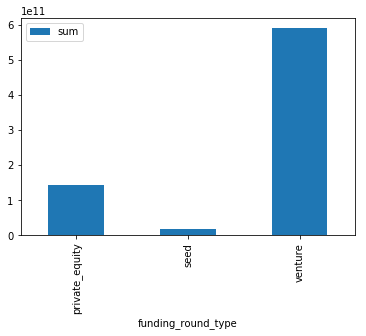

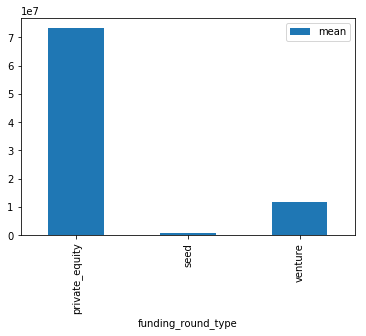

In [47]:
v1.plot(kind='bar')
v2.plot(kind='bar')

2.) A plot showing the top 9 countries against the total amount of investments of
funding type FT. This should make the top 3 countries (Country 1, Country 2,
and Country 3) very clear.


In [48]:
top9=pd.DataFrame(top9)
top9.reset_index(inplace=True)

<BarContainer object of 9 artists>

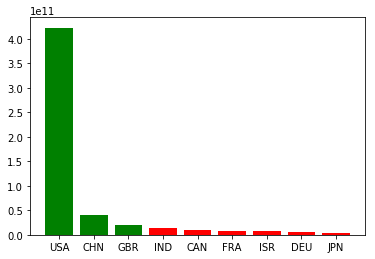

In [49]:
plt.bar(top9['country_code'],height=top9['raised_amount_usd'],color=['green','green','green','red','red','red','red','red','red'])

3.) A plot showing the number of investments in the top 3 sectors of the top 3
countries on one chart (for the chosen investment type FT).
This plot should clearly display the top 3 sectors each in Country 1, Country 2, and
Country 3.  

In [67]:
c1=D1.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)
c2=D2.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)
c3=D3.groupby('main_sector')['raised_amount_usd'].count().sort_values(ascending=False).head(3)

In [68]:
c1=pd.DataFrame(c1)
c2=pd.DataFrame(c2)
c3=pd.DataFrame(c3)
c1.reset_index(inplace=True)
c2.reset_index(inplace=True)
c3.reset_index(inplace=True)
c1['country']='USA'
c2['country']='GBR'
c3['country']='IND'
c=pd.concat([c1,c2,c3])

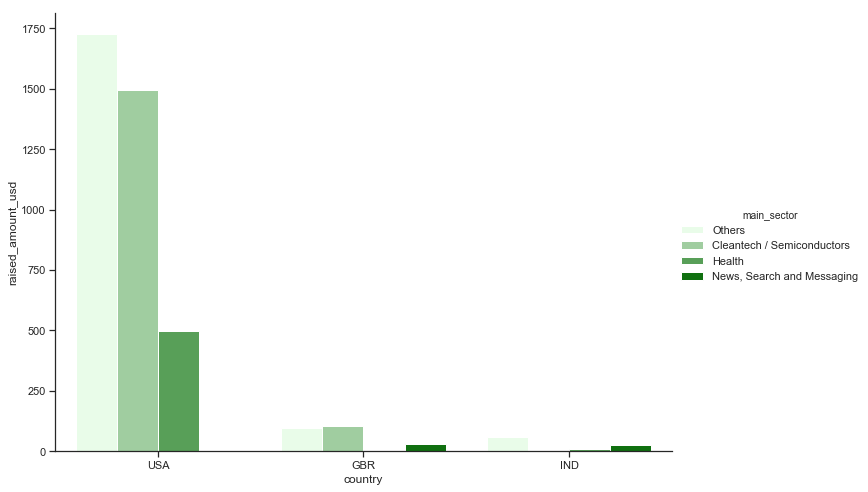

In [70]:
import seaborn as sns
sns.set(style='ticks',color_codes=True)
sns.catplot(x='country',y='raised_amount_usd',hue='main_sector',kind='bar',data=c,height=7,aspect=11.5/8.25,color='green')
